<a href="https://colab.research.google.com/github/DrewHopkins/Inviscid-Burgers-Godunov-Scheme/blob/main/Inviscid_Burgers_Godunov_Scheme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is the Numerical Solution

In [ ]:
# initialize block
def initialize_block():
  CFL = 0.5
  gridPoints = [30,100,400]
  x = pd.Interval(left=-0, right=2 * np.pi , closed='both')
  timestamps = [1,2,3]
  return CFL, gridPoints, x, timestamps

In [ ]:
# define all useful functions/definitions
def deltaX(x,steps):
  deltax = x.length / steps
  return deltax

def xArray(steps,deltax):
  x = []
  for i in range(steps):
    x.append( deltax * i )
  return x

def deltaT(CFL, deltax, u):
  deltat = CFL * deltax / max(u[0]) 
  return deltat

def tArray(endTime,deltat):
  t = []
  for i in range(int(endTime/deltat+1)):
    t.append( deltat * i )
  return t


def InitialConds(steps,deltax):
  u = [[]]
  for i in range(steps):
    u[0].append( 0.5 * (1 + np.sin(x[i])) )
  return u

def numericalScheme(u,deltax,deltat,n,i):
  pres = u[n][i]
  if (i==0):
    if (pres>0):
      prev = 2.0*pres - u[n][1]
    else: prev = pres
  else: prev = u[n][i-1]
  if (i==len(x)-1):
    fut = pres
  else: fut  = u[n][i+1]
  uu = deltat/(deltax)*(godunov(prev,pres)-godunov(pres,fut))+pres
  return uu

def flux(uu):
   return 0.5*uu**2;

def godunov(uL,uR):
  FL = flux(uL)
  FR = flux(uR)
  if (uL>uR):
    return max(FL,FR)
  if (uR>uL):
    return min(FL,FR)
  if (uR == uL):
    return FL


def plot(x,u,t,time,g):
  array = np.asarray(t)
  idx = (np.abs(array - time)).argmin()
  fig, ax = plt.subplots()
  ax.plot(x,u[idx])
  plt.title("Analytical solution at t = %s" %time)
  plt.xlabel("x direction")
  plt.ylabel("U")
  textstr = '\n'.join((
    r'Number of Grid Points %s' %g,
    r'At timestamp t = %s' %time))
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
  plt.show()

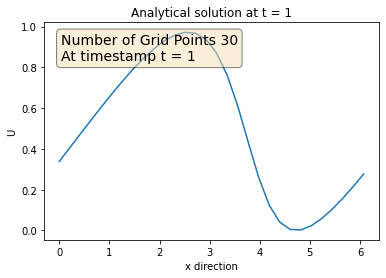

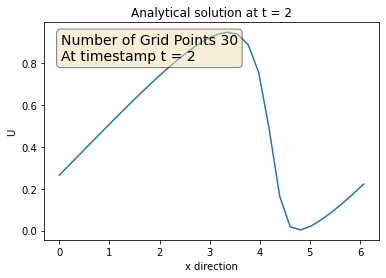

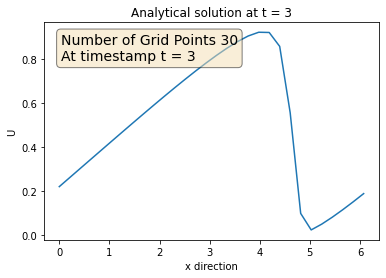

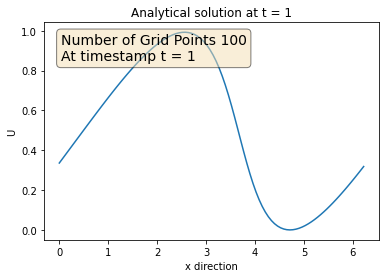

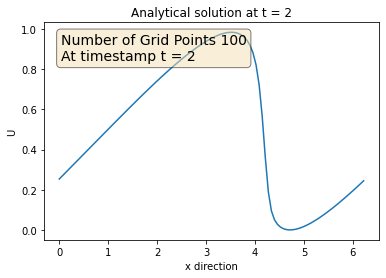

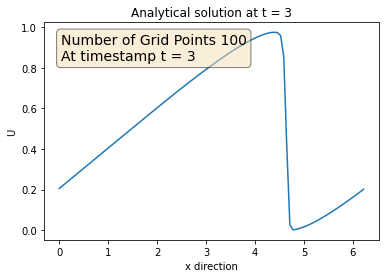

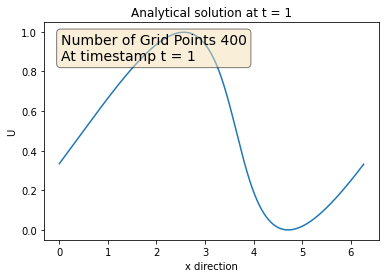

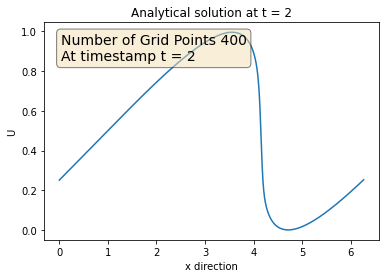

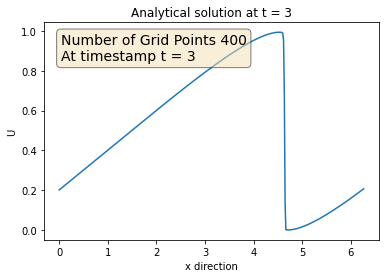

In [ ]:
CFL ,gridPoints, interval, timestamps = initialize_block()
for g in gridPoints:
  deltax = deltaX(interval,g)
  x = xArray(g,deltax)
  u = InitialConds(g,deltax)
  deltat = deltaT(CFL, deltax, u)
  endTime = timestamps[-1]
  t = tArray(endTime,deltat)
  for n in range(len(t)):
    u.append([])
    for i in range(len(x)):
      u[n+1].append(numericalScheme(u,deltax,deltat,n,i))
  for time in timestamps:
    plot(x,u,t,time,g)

# This is the Analytical Solution

In [ ]:
a1 = np.loadtxt('u_exact_t_1.dat', unpack = True)
a2 = np.loadtxt('u_exact_t_2.dat', unpack = True)
a3 = np.loadtxt('u_exact_t_3.dat', unpack = True)

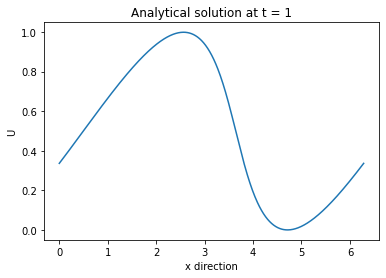

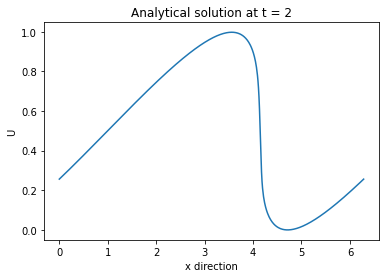

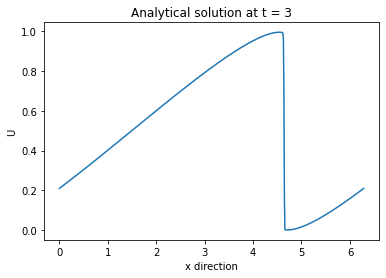

In [ ]:
analytical_data = [a1,a2,a3]
j=0
for i in analytical_data:
  j=j+1
  plt.plot(i[0],i[1])
  plt.title("Analytical solution at t = %s" %j)
  plt.xlabel("x direction")
  plt.ylabel("U")
  plt.show()